In [2]:
import numpy as np
import pandas as pd

In [3]:
emotion_df = pd.read_csv('/content/text.csv')

In [4]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [8]:
violence_df = pd.read_csv('/content/Train.csv')

In [9]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [10]:
hate_df = pd.read_csv('/content/labeled_data.csv')

In [11]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [216]:
# Check if 'Unnamed: 0' exists in emotion_df before dropping
if 'Unnamed: 0' in emotion_df.columns:
    emotion_df.drop(columns=['Unnamed: 0'], inplace=True)

# Check if 'Tweet_ID' exists in violence_df before dropping
if 'Tweet_ID' in violence_df.columns:
    violence_df.drop(columns=['Tweet_ID'], inplace=True)

# Correctly drop columns from hate_df, checking for existence
columns_to_drop_hate = ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither']
existing_columns_hate = [col for col in columns_to_drop_hate if col in hate_df.columns]
hate_df.drop(columns=existing_columns_hate, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [19]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [20]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [22]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [27]:
hate_df = hate_df[['tweet','class']]

In [28]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [29]:
emotion_df.columns , violence_df.columns , hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [32]:
violence_df.rename(columns={'tweet':'text','type':'label'},inplace=True)

In [34]:
hate_df.rename(columns={'tweet':'text','class':'label'},inplace=True)

/tmp/ipython-input-4283194435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_df.rename(columns={'tweet':'text','class':'label'},inplace=True)


In [39]:
# null
print(emotion_df.isnull().sum())
print('*'*20)
print(hate_df.isnull().sum())
print('*'*20)
print(violence_df.isnull().sum())
print('*'*20)

text     0
label    0
dtype: int64
********************
text     0
label    0
dtype: int64
********************
text     0
label    0
dtype: int64
********************


In [40]:
emotion_df.shape,violence_df.shape,hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

In [41]:
# Taking 12k from row from each as they dont have same number of rows
emotion_df['label'].value_counts()

,count
label,
1,141067
0,121187
3,57317
4,47712
2,34554
5,14972


In [43]:
e_df = pd.DataFrame()
for i in range(6):
  subset = emotion_df[emotion_df['label']==i].sample(n=2000,random_state=42)
  e_df = pd.concat([e_df,subset])

In [44]:
e_df.shape

(12000, 2)

In [47]:
emotion_df = e_df.copy()

In [48]:
emotion_df['label'].value_counts()

,count
label,
0,2000
1,2000
2,2000
3,2000
4,2000
5,2000


In [51]:
violence_df['label'].value_counts()

,count
label,
sexual_violence,32648
Physical_violence,5946
emotional_violence,651
economic_violence,217
Harmful_Traditional_practice,188


In [70]:
sexual_violence = violence_df[violence_df['label']=='sexual_violence'].sample(n=4998,random_state=42)
violence_df = violence_df[violence_df['label'] != 'sexual_violence']


In [71]:
violence_df.shape

(7002, 2)

In [72]:
violence_df = pd.concat([violence_df,sexual_violence],axis=0)
violence_df.shape

(12000, 2)

In [73]:
hate_df['label'].value_counts()

,count
label,
1,12814
2,4163
0,1430


In [74]:
offensive_speech = hate_df[hate_df['label'] == 1].sample(n= 6407 , random_state=42)
hate_df = hate_df[hate_df['label'] != 1]

In [75]:
hate_df.shape

(5593, 2)

In [76]:
hate_df = pd.concat([offensive_speech, hate_df],axis = 0)

In [77]:
hate_df.shape

(12000, 2)

In [78]:
emotion_df.shape,hate_df.shape,violence_df.shape

((12000, 2), (12000, 2), (12000, 2))

In [79]:
emotion_df.head(3)

,text,label
133243,ive learned to surround myself with women who ...,0
88501,i already feel crappy because of this and you ...,0
131379,i feel like i have lost mourned and moved past...,0


In [80]:
hate_df.head(3)

,text,label
1252,&#8220;@FreakyAbandoned: Mental Asylum in Dall...,1
7261,@vivaalakatyy @J_Fritzy @Lompartayy at least I...,1
2783,@Caroline_Poe bitch im 17? And i didnt follow ...,1


In [81]:
violence_df.head(3)

,text,label
6,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence
29,"Best thing for me to do, is remain silent when...",Physical_violence
30,"My husband will never beat me, Bambam denies r...",Physical_violence


In [84]:
# resetting the index values as they are very different to each other
emotion_df.reset_index(drop = True ,inplace = True)
violence_df.reset_index(drop = True ,inplace = True)
hate_df.reset_index(drop = True ,inplace = True)

In [85]:
emotion_df.head(3)

,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0
2,i feel like i have lost mourned and moved past...,0


In [86]:
violence_df.head(3)

,text,label
0,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence
1,"Best thing for me to do, is remain silent when...",Physical_violence
2,"My husband will never beat me, Bambam denies r...",Physical_violence


In [87]:
hate_df.head(3)

,text,label
0,&#8220;@FreakyAbandoned: Mental Asylum in Dall...,1
1,@vivaalakatyy @J_Fritzy @Lompartayy at least I...,1
2,@Caroline_Poe bitch im 17? And i didnt follow ...,1


In [91]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [93]:
label_encoder = LabelEncoder()
violence_df['label'] = label_encoder.fit_transform(violence_df['label'])

In [94]:
violence_df.head()

,text,label
0,"My Husband Beats Me Frequently, Wife Tells Cou...",1
1,"Best thing for me to do, is remain silent when...",1
2,"My husband will never beat me, Bambam denies r...",1
3,"theyre like, i just wanna be a baby maker with...",1
4,"I was in England for a week, the longest I’ve ...",1


In [95]:
violence_df['label'].unique()

array([1, 3, 0, 2, 4])

In [96]:
# Stop words removal
import nltk
from nltk.corpus import stopwords

In [105]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [113]:
# loading the stopwords
stop_words = set(stopwords.words('english'))

In [100]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [172]:
# [53] #stopwords removal function

def remove_stopwords(text):
    all_words = nltk.word_tokenize(text)
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
violence_df['text'] = violence_df['text'].apply(remove_stopwords)
hate_df['text'] = violence_df['text'].apply(remove_stopwords)

In [173]:
# Toeknization and Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [174]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'],violence_df['text'],hate_df['text']]))

In [175]:
emotion_sequences = tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequences = tokenizer.texts_to_sequences(violence_df['text'])
hate_sequences = tokenizer.texts_to_sequences(hate_df['text'])

In [176]:
emotion_df['text'].iloc[2]

'feel like lost mourned moved past tears relationship'

In [177]:
emotion_sequences[2:3]

[[5, 6, 301, 18822, 1087, 397, 932, 319]]

In [178]:
max_length = 50
emotion_padded = pad_sequences(emotion_sequences, maxlen=max_length, padding='post')
emotion_padded.shape

(12000, 50)

In [179]:
violence_padded = pad_sequences(violence_sequences, maxlen=max_length, padding='post')
violence_padded.shape

(12000, 50)

In [180]:
hate_padded = pad_sequences(hate_sequences, maxlen=max_length, padding='post')
hate_padded.shape

(12000, 50)

In [181]:
emotion_padded[2:3]

array([[    5,     6,   301, 18822,  1087,   397,   932,   319,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)

In [182]:
# converting to numpy
import numpy as np
emotion_labels = np.array(emotion_df['label'])
violence_labels = np.array(violence_df['label'])
hate_labels = np.array(hate_df['label'])

In [183]:
# Model definition
emotion_input = emotion_padded
violence_input = violence_padded
hate_input = hate_padded

In [184]:
# defining multiple input layer for each task
from tensorflow import keras
emotion_input_layer = keras.layers.Input(shape = (max_length,),name='emotion_input')
violence_input_layer = keras.layers.Input(shape = (max_length,),name='violence_input')
hate_input_layer = keras.layers.Input(shape = (max_length,),name='hate_input')

In [185]:
# Used a shared embedding layer
embedding_layer = keras.layers.Embedding(input_dim = len(tokenizer.word_index)+ 1 , output_dim = 128)

In [186]:
# Applying embedding layer to each input
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [187]:
# Shared LSTM layer
shared_lstm = keras.layers.LSTM(64, return_sequences=True)

In [188]:
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm =  shared_lstm(hate_embedding)

In [189]:
# shared global average pooling layer and dropout layer
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [190]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [191]:
print(len(emotion_df['label'].unique()))
print(len(violence_df['label'].unique()))
print(len(hate_df['label'].unique()))

6
5
3


In [212]:
# output layers
emotion_output = keras.layers.Dense(6,activation='softmax',name='emotion_output')(emotion_features)
violence_output = keras.layers.Dense(5,activation='softmax',name='violence_output')(violence_features)
hate_output = keras.layers.Dense(3,activation='softmax',name='hate_output')(hate_features)

In [213]:
model = keras.models.Model(
    inputs = [emotion_input_layer,violence_input_layer,hate_input_layer],
    outputs = [emotion_output,violence_output,hate_output]
)

In [214]:
#Compile the model with multiple inputs and outputs


model.compile(
    optimizer = 'adam',
    loss = {
        'emotion_output':'sparse_categorical_crossentropy',
        'violence_output':'sparse_categorical_crossentropy',
        'hate_output':'sparse_categorical_crossentropy'
    },
    metrics = {
        'emotion_output': 'accuracy',
        'violence_output': 'accuracy',
        'hate_output': 'accuracy'
    }
)

In [215]:
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 50, 128)   │  3,038,464 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 50, 64)    │     49,408 │ embedding_1[0][0… │
│                     │                   │            │ embedding_1[1][0… │
│                     │                   │            │ embedding_1[2][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm_1[0][0],     │
│ (GlobalAveragePool… │                   │            │ lstm_1[1][0],     │
│                     │                   │            │ lstm_1[2][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        325 │ dropout_2[1][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ dropout_2[2][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,088,782 (11.78 MB)

 Trainable params: 3,088,782 (11.78 MB)

 Non-trainable params: 0 (0.00 B)

In [217]:
model.fit(
  x = {
    'emotion_input':emotion_input,
    'violence_input':violence_input,
    'hate_input': hate_input
  },
  y = {
     'emotion_output': emotion_labels,
     'violence_output' : violence_labels,
     'hate_output' : hate_labels
  },
  epochs = 10,
  batch_size = 4
)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 262s 85ms/step - emotion_output_accuracy: 0.1973 - emotion_output_loss: 1.7800 - hate_output_accuracy: 0.7612 - hate_output_loss: 0.6256 - loss: 2.8007 - violence_output_accuracy: 0.8544 - violence_output_loss: 0.3951
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 307s 100ms/step - emotion_output_accuracy: 0.7444 - emotion_output_loss: 0.7103 - hate_output_accuracy: 0.8435 - hate_output_loss: 0.4516 - loss: 1.2599 - violence_output_accuracy: 0.9670 - violence_output_loss: 0.0979
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 268s 89ms/step - emotion_output_accuracy: 0.9380 - emotion_output_loss: 0.2047 - hate_output_accuracy: 0.8471 - hate_output_loss: 0.4267 - loss: 0.6529 - violence_output_accuracy: 0.9949 - violence_output_loss: 0.0215
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 318s 106ms/step - emotion_output_accuracy: 0.9635 - emotion_output_loss: 0.1130 - hate_output_accuracy: 0.8510 - hate_output_loss: 0.3893 - loss: 0.5104 - violence_output_accura

In [218]:
# prediction and evaluation
prediction = model.predict({
    'emotion_input':emotion_input,
    'violence_input':violence_input,
    'hate_input':hate_input
})

375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step


In [219]:
emotion_pred = np.argmax(prediction[0],axis = 1)
violence_pred = np.argmax(prediction[0],axis = 1)
hate_pred = np.argmax(prediction[0],axis = 1)

In [220]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [221]:
violence_df['label'].unique()

array([1, 3, 0, 2, 4])

In [222]:
def plot_cm(true,pred,title,labels):
  cf = confusion_matrix(true,pred)
  df_cm = pd.DataFrame(cf,index=labels,columns=labels)
  plt.figure(figsize=(10,10))
  sns.heatmap(df_cm,annot=True,cmap=plt.cm.Blues,fmt='g')
  plt.title(title)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


emotion_label_text = ['sadness','joy','love','anger','fear','surprise']
violence_label_text = ['sexual_violence','physical_violence','emotional_violence','Harmful_traditional_practice','economic_violence']
hate_label_text = ['offensive_speech','Neither','Hate Speech']

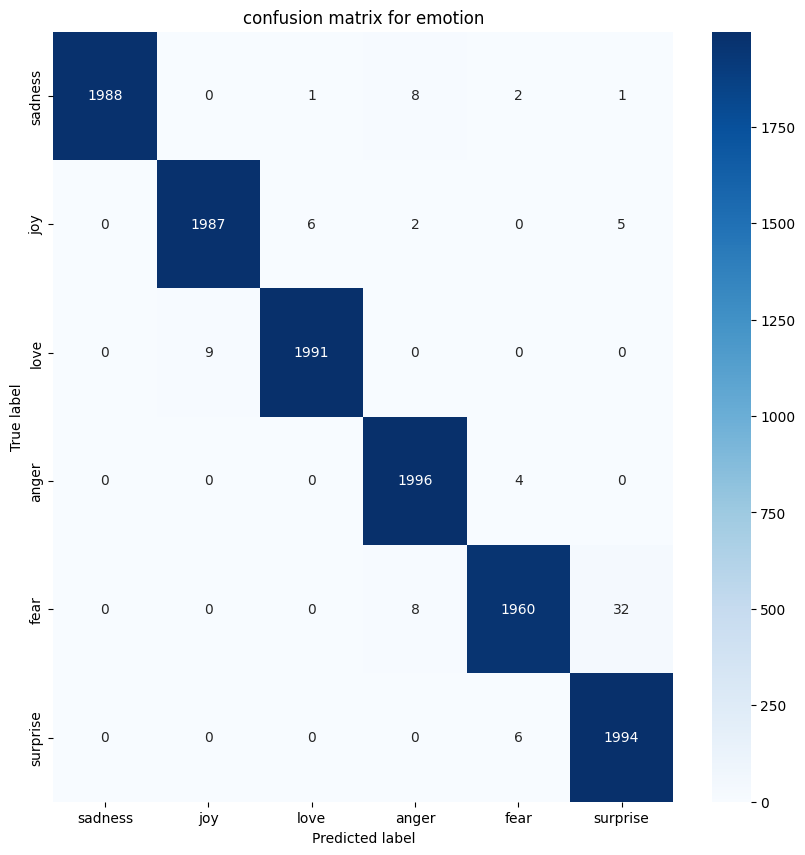

ValueError: Shape of passed values is (6, 6), indices imply (5, 5)

In [223]:
plot_cm(emotion_labels,emotion_pred,'confusion matrix for emotion',emotion_label_text)
plot_cm(violence_labels,violence_pred,'confusion matrix for violence',violence_label_text)
plot_cm(hate_labels,hate_pred,'confusion matrix for hate',hate_label_text)

In [224]:
def classify_text(input_text):
    #preprocess the input text
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_sequence, maxlen = max_length, padding = 'post')

    #prediction
    prediction = model.predict({'emotion_input' : emotion_padded,
                                'violence_input': violence_padded,
                                'hate_input': hate_padded})

    emotion_pred = np.argmax(prediction[0], axis = 1)
    violence_pred = np.argmax(prediction[1], axis = 1)
    hate_pred = np.argmax(prediction[2], axis = 1)

    #determine major label
    major_labels = ['Emotion', 'Violence', 'Hate']
    major_label_index = np.argmax([np.max(predictions[0]), np.max(predictions[1]), np.max(predictions[2])])
    major_label = major_labels[major_label_index]

    #determing sub - labels
    emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_practice',]
    hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']

    if major_label == 'Emotion':
        sub_label = emotion_labels_text[emotion_pred]
    elif major_label == 'Violence':
        sub_label = violence_labels_text[violence_pred]
    else:
        sub_label = hate_labels_text[hate_pred]

    return major_label, sub_label

In [225]:
import ipywidgets as widgets
from IPython.display import display

#define a text widget and a placeholder
input_text_widget = widgets.Text(
    description = 'Input text : ',
    placeholder = 'Enter you text'
)

#define classify button
button = widgets.Button(description = 'classify')

#define an output area to display result
output = widgets.Output()

#function to handle event
def on_button_click(b):
    with output:
        output.clear_output() #clear the previous output
        input_text = input_text_widget.value
        major_label, sub_label = classify_text(input_text)
        print(f'Major Label : {major_label}')
        print(f'Sub Label : {sub_label}')

#attach the button at bottom
button.on_click(on_button_click)

display(input_text_widget, button, output)

Text(value='', description='Input text : ', placeholder='Enter you text')

Button(description='classify', style=ButtonStyle())

Output()